<img src = "cl-logo.png"> 
***
## Craigslist library

Laura Goyeneche <br>
lgoyenec@andrew.cmu.edu <br>
MSPPM Data Analytics '20 <br>
Heinz College <br>
Carnegie Mellon University <br>

### Index 

1. <a href = "#int" >Introduction</a>
2. <a href = "#lib" >Requirements</a>
3. <a href = "#desc">Library description</a>
4. <a href = "#app" >Example application</a>
5. <a href = "#con" >Conclusion</a>
6. <a href = "#ref" >References</a>

## <a id = "int">Introduction</a>
This tutorial will introduce you to the `craigslist` library, and will walk you through an introductory analysis of the data. *Craigslist* corresponds to one of the most powerful websites for online marketing. Its marketplace connects buyers and sellers in 570 cities over 70 countries. With this information you can gather relevant inputs about the behavior of different markets in order to respond many questions such as, how are the housing prices around a specific area? what type of jobs one can find through Craigslist? how often individuals use it for meeting people?, among others.

## <a id = "lib">Requirements</a>

### Installation
For the following analysis, you'll be using two libraries in particular: `craiglist` and `plotly`. The first one, corresponds to the data of interest. The section <a href = "#desc">Library description</a> will provide you with the details of this dataset and its fascinating different types of information. The second one, you'll be using it through the notebook to create interactive visualizations; some basic description will be find as well. The installation using `pip` is: <br>

`pip install python-craigslist` <br>
`pip install plotly==4.1.0` <br>

Considering that Craigslist contains text data, this tutorial requires the library `wordcloud`. This library will allow you to create basic analysis with text. The installation using `pip` is: <br>

`pip install wordcloud` <br>

### Importing

After you install the libraries, run the following commands and make sure that they run without mistake. Sometimes `craigslist` library don't run in the first attempt due to connection. **Don't worry, this is normal !** Run it for the second time, it should work. 

In [1]:
# Craigslist
import craigslist as cl

# Web scrapping
import re
from requests import get
from bs4 import BeautifulSoup

# Plotly
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Matplotlib
import matplotlib.pyplot as plt

# Word Cloud
import wordcloud
from wordcloud import WordCloud

# Text analysis
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

# Other
import pandas as pd
import numpy as np

pio.renderers.default = "notebook_connected"

Before we start exploring this library, let me respond **few questions** that you may have right now:

1. *Why aren't you directly scrapping the information from the Craigslist website?*

    * Well, that's a great question! Simple answer: it was easier. Someone already took the time to scrapped the information for us! Why should we bother? 
    * However, in this tutorial you'll observe that by using this library, we don't have control over the code; for instance, we can't make changes to pull the information in a different way. For that reason, in <a href = "#app">Example Application</a>: ***Is somebody watching you?*** you'll find a small demonstration of how to scrap Craigslist data, and in <a href = "#ref">References</a> additional links in case you're interest. 
    

2. *Why we should import all the libraries above?*

    * <font color = green>plotly.express</font>: creates visualization for `pandas.DataFrame`
    * <font color = green>plotly.graph_objects</font>: creates visualization for data in different formats different to tidy dataframes
    * <font color = green>make_subplots</font>: creates a grid or matrix of plots 
    * <font color = green>plotly.io</font>: allows as to save static images of visualizations we'll be creating or embed it in a Jupyter notebook 
    * <font color = green>matplotlib.pyplot</font>: other library to create plots
    * <font color = green>wordCloud</font>: generates descriptive text analysis
    * <font color = green>nltk</font>: text analysis - remove stopwords, calculate frequency of words
  

3. *What does `pio.renderers.default = "notebook_connected"` do?* 
    
    * This allows you to render Jupyter notebooks in nbviewer. **Don't forget to import it!** 

## <a id = "desc">Library description:</a>

Good news! This library it's simple and easy to understand. We'll go through each one of its categories and explore what type of analysis we can do with the information. 

### Class and Subclasses

This library contains a main *class* `CraigslistBase` and *subclasses* named as the categories in Craigslist website. In the following image we can observe the website [Craigslist Pittsburgh](https://pittsburgh.craigslist.org/). The subclasses corresponds to the titles with <font color = red>red checks</font>.

<img src = "cl-pitt.jpg" style="width: 600px;"/> 

As observe in the image, but with a different name, the different subclasses are:

* `CraigslistCommunity`
* `CraigslistHousing`
* `CraigslistJobs`
* `CraigslistForSale`
* `CraigslistEvents`
* `CraigslistServices`
* `CraigslistGigs`
* `CraigslistResumes`

To observe the filters of the main class and subclasses, you must call `cl`. It allows you to explore the set of filters that you can use to query the data. Let's observe how we can personalize our query in `Jobs` subclass:

In [3]:
cl.CraigslistJobs.show_filters()

Base filters:
* query = ...
* search_titles = True/False
* has_image = True/False
* posted_today = True/False
* bundle_duplicates = True/False
* search_distance = ...
* zip_code = ...
Section specific filters:
* is_internship = True/False
* is_nonprofit = True/False
* is_telecommuting = True/False
* employment_type = 'full-time', 'part-time', 'contract', "employee's choice"


Fascinating ! Looking for a full time job as web or info design? You might find it in Craigslist !

### Basic filters

Now that we understand the class and subclasses in the library, let's select our city and/or area of interest. But first things first. To be able to access to the information, we need the following elements:

* `site`: city or country of interest
* `area` (optional): area in the place of interest; i.e. Manhattan, Queens or Bronx in New York City
* `category`: category of interest; i.e. sublets in Housing or activities in community

As an example, we'll get those objects from Craigslist Chicago: 

1. Go to https://www.craigslist.org/about/sites


2. Search *Chicago*, and **click** on it


3. You'll be directed to https://chicago.craigslist.org/ (image below)


4. `site` (<font color = purple>**purple**</font> box):
    * You'll always be directed to `<site>.craigslist.org`
    * The value fo `<site>` is the one you are going to use. In this case, `site = chicago`
    
    
5. `area` (<font color = red>**red**</font> box): 
    * It's importat to point out that not all sites have area. 
    * Click in the area of interest, and the value of `<area>` is the one `<site>.craigslist.org/<area>/`
    * If you are interest in *City of Chicago*, click on `chc` and you'll be redirected to [chicago.craigslist.org/chc/](https://chicago.craigslist.org/chc/)
    
    
6. `category` (<font color = green>**green**</font> box): 
    * Click in the subclass of interest. 
    * You'll be redirected to `<site>.craigslist.org/d/<category-name>/search/<area>/<category>`
    * The value of `<category>` is the one you are going to use
    * Following the image below, the category for jobs in accounting or finance is `acc`
    * As mentioned before, it's not mandatory to include `area`. The links will change a bit. 
    
        a. With area: https://chicago.craigslist.org/d/accounting-finance/search/chc/acc <br>
        b. Without area: https://chicago.craigslist.org/d/accounting-finance/search/acc
        
        Can you notice the difference? Not much right? But still, be aware of it !

<img src = "cl-chi2.jpg"  style="width: 800px;"/> 

Now that you know the elements of the library, it's time to analyze the data. 

### Warnings

- Queries might take few seconds or minutes depending on the number of results
- There is a limit in the number of reuslts: maximum 3,000
- Results change daily: new posts are created and some other expired

## <a id = "app">Example Application</a>

Now a days we have thousands of different type of data available. What's amazing about that, is that we are able to learn from it. This library provides us with data that will help you to understand for instance, the rentals market in an specific city (or across all the cities in Craigslist; a potential idea that you might be interest on!), analyze what type of items individuals are willing to give for free and how depreciated they are, among other examples. 

1. Furnished rentals in West Loop Chicago <br>
2. Your unwanted admirer: Pittsburgh <br>

### Furnished rentals in Chicago

First, we'll go through the ***apartments*** category in the subclass **Housing** in Chicago, specifically the furnished rental market in Chicago 3 miles around Millenium Park. We'll explore the distribution of the prices, available characteristics and the correlation between the variables of interest. In addition, we'll create a word cloud with the rentals description and map the rentals from our example query. 

For a better understanding of what you'll see in the examples, the following is the content list: <br>
* Query results based on specific list of filters <br>
* Data manipulation: *change data type, apply regular expressions to string variables* <br>
* Descriptive statistics for prices, area and number of bedrooms <br>
* Linear regression analysis <br>
* Text visualization: rentals posts <br>
* Map of rentals across Chicago

### a. Query

Before indicating the variables to filter the query, is good practice to look through the basic filters that each one of the subclasses that are in library. As we observe, `CraigslistHousing` provides multiple filters to make our query as personalize as we want. 

In [2]:
# Filters: the option show_filters() show the filters of any of the subclasses
cl.CraigslistHousing.show_filters()

Base filters:
* query = ...
* search_titles = True/False
* has_image = True/False
* posted_today = True/False
* bundle_duplicates = True/False
* search_distance = ...
* zip_code = ...
Section specific filters:
* private_room = True/False
* private_bath = True/False
* cats_ok = True/False
* dogs_ok = True/False
* min_price = ...
* max_price = ...
* min_ft2 = ...
* max_ft2 = ...
* min_bedrooms = ...
* max_bedrooms = ...
* min_bathrooms = ...
* max_bathrooms = ...
* no_smoking = True/False
* is_furnished = True/False
* wheelchair_acccess = True/False
* housing_type = 'apartment', 'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'loft', 'townhouse', 'manufactured', 'assisted living', 'land'
* laundry = 'w/d in unit', 'w/d hookups', 'laundry in bldg', 'laundry on site', 'no laundry on site'
* parking = 'carport', 'attached garage', 'detached garage', 'off-street parking', 'street parking', 'valet parking', 'no parking'


After going through the filters, and as stated in the introduction of this section, we'll interested on the furnished rentals 5 miles around Millenium Park (zip code *60601*) in Chicago. As observe in the code, the dictionary `cl_filters` contains the key filters for our query. Take into account that we're also adding the filter `bundle_duplicates: True`. This variable ensures that we end up with unique observations. 

In addition, we are filtering apartments rentals (`category = apa`) in Chicago (`site = Chicago`) on `cl_housing`, and getting the results sort by date and adding the geotag (longitude and latitude) on `cl_results`. 

In [4]:
# Define filters 
cl_filters = {"bundle_duplicates" : True, 
              "search_distance"   : 3,
              "zip_code"          : 60601,
              "is_furnished"      : True}

# Filter the Craigslist object
cl_housing = cl.CraigslistHousing(site = "chicago", category = "apa", filters = cl_filters)

# Sort by newest and add location (longitute and latitude)
cl_results = cl_housing.get_results(sort_by = 'newest', geotagged = True)

Now, let's save that information in a list!

In [5]:
# Create and populate a list
# Try and except let the loop run until it's permitted (> 3,000)
# This might take some minutes
df_housing = []
for i in cl_results: 
    try:    
        df_housing.append(i)
    except: 
        pass

In [6]:
# Number of results ~ 300 
len(df_housing)

383

### b. Data manipulation

To analyze the data in the right way, we need to guarantee that the *type* of the variables is correct. We'll convert the list to a pandas DataFrame. This format it's easy to visualize using with `plotly`. Then, we'll observe the first five observations in order to identify some inconsistencies in the data, specially for the variables `price`, `area` and `bedrooms`. For instance, `area` corresponds to a string that contains the area (numeric) + 'ft2'; we want to remove 'ft2'. 

In [7]:
# Transform df_housing list to a pandas DataFrame in order to use plotly.express
df_housing = pd.DataFrame(df_housing)

In [8]:
# Always observe what are you getting from the query: get data columns
df_housing.columns

Index(['area', 'bedrooms', 'datetime', 'geotag', 'has_image', 'id',
       'last_updated', 'name', 'price', 'repost_of', 'url', 'where'],
      dtype='object')

In [9]:
# Let's observe the first 5 observations of the variables of interest
ff.create_table(df_housing[['price','area','bedrooms','geotag','where']].head())

In [10]:
# Extract number from string in variable `area` and `price`
# Convert `area`, `price` and `bedrooms` from object to int in order find statistics
# For results without `area`, first we need to replace NaN as 0 and then replace again with NaN
df_housing['area']     = df_housing.area.str.extract('(\d+)').fillna(0).astype(int).replace(0, np.nan)
df_housing['price']    = df_housing.price.str.extract('(\d+)').astype(int)
df_housing['bedrooms'] = df_housing.bedrooms.str.extract('(\d+)').fillna(99).astype(int).replace(99, np.nan)

### c. Descriptive Statistics

Now that our data is ready, we can analyze it with some simple descriptive statistcs!

In [11]:
# Descriptive statistics of all variables
ff.create_table(df_housing[['price','area','bedrooms']].describe().round(2).T, index = True)

Rendering a descriptive statistics table give us a good summary of our variables. From that information we observe that the average rent price is USD 2,390 with a standard deviation of USD 1,105. Moreover, some of the apartments didn't report the price ($0), those observations count as missing values. In addition, both area and bedrooms variables have missing values; 31% and 17%, respectively. 

In [12]:
# Generate layout of grid / matrix of box plots
fig = make_subplots(rows = 1, cols = 3)

# Box plot Price
fig.add_trace(go.Box(y            = df_housing['price'], 
                     name         = 'Price', 
                     boxpoints    = "all",
                     marker_color = '#582E5A'), row = 1, col = 1)
# Box plot Area
fig.add_trace(go.Box(y            = df_housing['area'], 
                     name         = 'Area',
                     boxpoints    = "all",
                     marker_color = '#B98389'), row = 1, col = 2)
# Box plot Bedrooms
fig.add_trace(go.Box(y            = df_housing['bedrooms'], 
                     name         = 'Bedrooms',
                     boxpoints    = "all",
                     marker_color = '#854798'), row = 1, col = 3)

fig.update_layout(title_text = "Box plot of variables of interest", width = 900, height = 500)
fig.show()

Plotting those results also helps us to understand the distribution of the variables. There's clearly concentration of apartments between 500 and 100 ft2, mostly half of them with 1 bedroom and prices concentrated between USD 1,500 and USD 3,000. This results aren't surprising, Chicago is one of the biggest cities in US. However, the area where Millenium Park is, the Loop, it's not only a touristc area, but one with multiple locations of several universities. Despite, it's out of the scope of this tutorial, a future question to answer is: How do students pay the rent? Assuming that students can't afford these prices, how's the commuting? ... 

In [13]:
# Histogram of Price
px.histogram(df_housing, 
             x      = "price",  
             nbins  = 50,
             title  = "Distribution of rent price",
             labels = {"price": "Price"},
             width  = 900, height = 400,
             color_discrete_sequence  = ["#AF90A9"]).show()

In addition to the boxplot of prices, it's also interesting to observe it's histogram. It's evident that the distribution isn't normal. Nevertheless, we observe that the prices are concentrated in two points of the distribution: around USD 1,800 and USD 2,800. What is also important to notice is that they aren't much apartament with a monthly rent higher that USD 4,500. This result is surprising... around Millenium Park they're luxurious constructions. However, one can justify that those luxurious apartments are posted in other websited different from Craigslist. 

In [14]:
# Data table 
tab_bedrooms  = pd.DataFrame({"bedrooms": df_housing['bedrooms'].value_counts(), "label": [1,2,3,4,5]})

# Bar plot bedrooms
px.bar(tab_bedrooms, 
       x      = "label",
       y      = "bedrooms",
       title  = "Number of bedrooms",
       labels = {"bedrooms": "Bedrooms"},
       width  = 900, height = 400,
       color_discrete_sequence  = ["#A05C7B"]).show()

From this graph we don't have much to say. As observe in the boxplot, most of the apartments in that area have 1 bedroom. The relevance of plotting this bar plot, is that it allows us to visualize that around 93% (294 out 317) of the posts in Craigslist Chicago have one or two bedrooms. 

### d. Linear Regression Analysis

So far, you have notice that from Craigslist we can have a general understanding of the housing market in any city (or all the cities) that we want. However, the information doesn't allows us to create a predictive model for the price base on the characteristics of the property, ammenities, sector, country (if needed), and others. Despite of this, I've create a linear model, that rather than predicting the price or getting the causal effect of a particular feature on price, we'll exemplify the correlation between the outcome (price) and its characteristics (area). 

As observe in the code, before calculating the OLS coefficiets and plotting the fitted values, we imputed the missing values in `area`. This imputation doesn't follows any methodology, it's replacing the `NaN` for a random normal distributed value with mean and standard deviation equal to the ones observe. We didn't analyze what type of missigness we have (MAR, MCAR, MNAR) and we didn't fix it following any methodology. 

In [114]:
# Scatter plot Price vs. Area + Regression Analysis (OLS)

# Copy original 
temp = df_housing.copy()

# Select min and max values to generate random values
mean = temp['area'].describe()[1]
std  = temp['area'].describe()[2]

# Create randomVal function to identify and replace missing values
def randomVal(x): 
    if pd.isna(x): return(float(np.random.normal(mean, std, 1)))
    else: return(x)

# Replacing NaN (aprox. 31.1% sample) with random values
temp['area'] = temp['area'].apply(lambda v: randomVal(v))

# Compute estimates under OLS
y       = temp["price"].values.copy()
X       = np.array([temp["area"], np.ones(len(temp))]).T
betahat = np.linalg.solve(X.T @ X, X.T @ y)
yhat    = X @ betahat

# Define scatter plot
fig = go.Figure()

# Scatter plot Price vs. Area "imputed" data
fig.add_trace(go.Scatter(x    = X[:,0],
                         y    = y,
                         name = 'Data "Imputed"',
                         mode = 'markers',
                         marker_color = '#A3C2BB'))

# Line plot Fitted values vs. Area "imputed" data
fig.add_trace(go.Scatter(x    = X[:,0],
                         y    = yhat, 
                         name = 'OLS Fit "Imputed"',
                         mode = "lines",
                         marker_color = '#820B8A'))

fig.show()

As expected we observe a **positive** relation between prices and area. This linear relation isn't reflecting the dynamic between prices and area. The scatter plot show us that despite it might be a positive relation between the two variables, there's high variance and they're clusters or groups for certain ranges of prices and areas. 

### e. Text Visualization

A first step towards analyzing data is to plot it and identify which words or group of words are more frequent than others. As part of the housing rentals example, the following code we'll provide you with a word cloud of the rentals around Millenium Park. Before identifying the most frequent words, make sure that you're identifying and removing the stop words or words that aren't informative about the rentals.

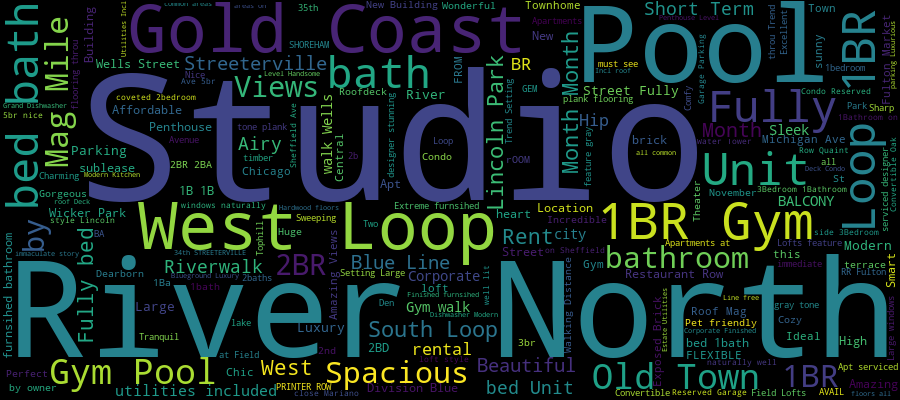

In [17]:
# Words to be eliminated 
stopwords = set({"Furnished",
                 "Apartment","Home","House",
                 "Bedroom","One","Floor",
                 "Now","Updated","Available","near",
                 "and","of","for","Bd","ASAP","in","the","to","Your","with"})

# Word Cloud
WordCloud(stopwords = stopwords,
          width     = 900, height = 400).generate(' '.join(df_housing['name'])).to_image()

We clearly observe that *studio*, *River North*, *West Loop*, *Pool*, *Spacious*, *1BR*, are some of the words that are more visible from the graph. Those words show that query was able to identify those places close to the area of interest. 

Moreover, it's informative about the ammenities of the places, which is a variable of interest when individuals are selecting a place. For example, from this information we could create dummy variables about ammenities such as pool or gym, also categorize by neighborhood or a more detail area in the city, whether an apartment have balcony or not, or if it's pet friendly or close to certain park. These corresponds to potential manipulation of the Craigslist data that we can do in order to have a better understanding of a specific housing market. 

### f. Map: rentals across Chicago

Finally, we're mapping the query results across Chicago. The size of the points are in function of the price, and the color, as shown in the legend, in function of the number of bedrooms. In addition, each point provides information about the area of each one of the properties. As mentioned before, most of the rentals around Millenium Park have 1 bedroom.

In [18]:
# From variable `geotag` extract latitude and longitude

# Copy original 
temp = df_housing.copy()
temp = df_housing.dropna(subset = ["geotag"])

temp['lat'] = temp.geotag.apply(lambda v: v[0])
temp['lon'] = temp.geotag.apply(lambda v: v[1])

# For a discrete legend: convert `bedrooms` to an object
temp.bedrooms = temp.bedrooms.fillna(0).astype(object)

# Points map across Pittsburgh
fig = px.scatter_mapbox(temp, 
                        lat        = "lat", 
                        lon        = "lon", 
                        color      = "bedrooms",
                        size       = "price",
                        hover_data = ["area"],
                        labels     = {"price": "Price ($) ", "area": "Area (ft2) ", "bedrooms": "Bedrooms"},
                        zoom       = 12, 
                        width      = 950, height = 500)

fig.update_layout(mapbox_style     = "carto-positron",
                  margin           = {"r":0, "t":0, "l":0, "b":0})
fig.show()

### Your unwanted admirer!

Second, we'll go through the ***missed connections*** category in the subclass **Community** in Pittsburgh, specifically 5 miles around Carnegie Mellon University. What is interesting about this information, is that there's a considerably quantity of posts made by anonymous individuals that want to either meet new people based on some characteristics (lady, sexy, between 18 and 27 years old) or meet with a person they've seen in an specific place at least one time (crazy, huh?)    
    
For a better understanding of what you'll see in the examples, the following is the content list: <br>
* Query results based on specific list of filters <br>
* Web scrapping posts text <br>
* Text analysis: frequency of nouns and adjectives <br>
* Responding **is there someone looking for you?**: based on function `word_search` <br>
* Map of `word_search` results <br>

For the following example w'll start with the same steps of the previous one: identifying the filters of the subclass of interest: *Community*, filtering the data and getting the results sort by data and with the geotag (longitude and latitude).

### a. Query

In [19]:
# Show filters
cl.CraigslistCommunity.show_filters()

Base filters:
* query = ...
* search_titles = True/False
* has_image = True/False
* posted_today = True/False
* bundle_duplicates = True/False
* search_distance = ...
* zip_code = ...
Section specific filters:


In [20]:
# Define filters 
cl_filters2 = {"bundle_duplicates" : True, 
               "search_distance"   : 5,
               "zip_code"          : 15289}

# Filter the Craigslist object
cl_missing  = cl.CraigslistCommunity(site = "pittsburgh", category = "mis", filters = cl_filters2)

# Sort by newest and add location (longitute and latitude)
cl_results2 = cl_missing.get_results(sort_by = 'newest', geotagged = True)

In [21]:
# Create and populate a list
# Try and except let the loop run until it's permitted (> 3,000)
# This might take some minutes
df_missing = []
for i in cl_results2: 
    try:    
        df_missing.append(i)
    except: 
        pass

In [22]:
# Number of results ~ 90
len(df_missing)

109

In [23]:
# Transform df_housing list to a pandas DataFrame in order to use plotly.express
df_missing = pd.DataFrame(df_missing)

### b. Scrapping: BeautifulSoup

The `craigslist` library works amazingly. We can access to the information without any inconvenient and without writing a long code scrapping the data. However, it has its limitations. For this example, the objective variable is the text of the post on Craigslist. This information is not provided after getting the results from the library. 

Despite that flaw, the library provide us the *url* of each one of the post. With the *url* we can access to the html information and scrape it to get the information of interest. The following code it's doing that: goes to each one of the 109 posts, scrap the text and add it our data frame. 

In [24]:
# Scrapping 

# Pattern regex
pat = re.compile(r'QR Code Link to This Post\n\n\n(\[w.]+)*')

# Create list with post 
col_text = []

for i in df_missing.url:
    response  = get(str(i))
    html_soup = BeautifulSoup(response.text, 'html.parser')
    val       = html_soup.find('section', id = 'postingbody')
    
    if val == None:
        col_text.append("NA")
    else:
        val = val.text
        col_text.append(re.split(pat, val)[2])

# Add column to Dataframe
df_missing['text'] = col_text

### c. Text analysis: nltk

With the text in each one of the results of our query and the library `nltk`, we can identify the nouns and adjectives. This library also tag (or identifies) the verbs, prepositions, and others. We are just tagging the ones mentioned in order to limit the analysis. As shown in the code, we're first identifying each one of the words, then removing the punctuation and stopwords, and finally identifying the nouns and adjectives. 

In [26]:
# Text analysis

# List of all words
words = ''
for i in col_text: words = words + i

# Remove punctuation
wordsPunct = RegexpTokenizer(r'\w+')
words      = wordsPunct.tokenize(words)

wordsList = ''
for i in words: wordsList = wordsList + ' ' + i

# Word tokenize
wordToken = word_tokenize(wordsList)

# Remove stop words
from nltk.corpus import stopwords

stopW      = set(stopwords.words('english'))
wordFilter = [i for i in wordToken if i not in stopW]

# Generate tags
# The library contains different tags for nouns, adjectives, verbs, etc.
# We are focuing just on nouns and adjectives
wordTag     = nltk.pos_tag(wordFilter)
wordTagNoun = [i[0] for i in wordTag if i[1] == 'NN' and len(i[0]) > 1]
wordTagAdj  = [i[0] for i in wordTag if i[1] == 'JJ' and len(i[0]) > 1]

# Calculate frequency of words
# Convert to pd.DataFrame
freqNoun = FreqDist(wordTagNoun)
freqAdj  = FreqDist(wordTagAdj)

In the last part of the previous code we're calculating the frequency of nouns and adjectives. We want to identify which words are more frequent. The following plots will show us that:

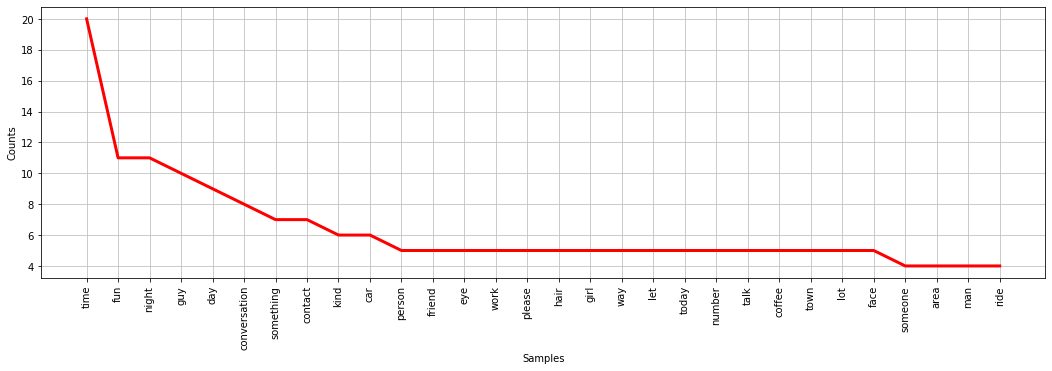

In [29]:
# Cumulative Frequency of Nouns
freqNoun.plot(30, 
              color      = 'red', 
              linewidth  = 3, 
              marker     = '', 
              cumulative = False)
plt.rcParams['figure.figsize'] = [18, 5]
plt.show()

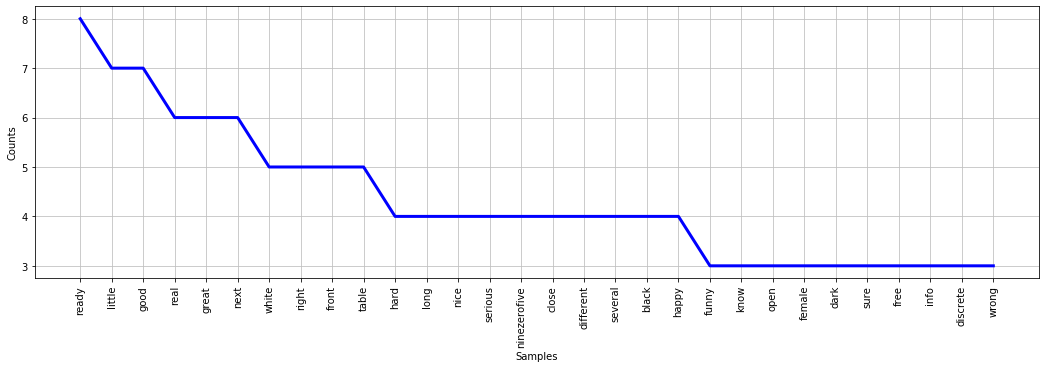

In [28]:
# Cumulative Frequency of Adjectives
freqAdj.plot(30,  
              color      = 'blue', 
              linewidth  = 3, 
              marker     = '', 
              cumulative = False)
plt.rcParams['figure.figsize'] = [18, 5]
plt.show()

From the plots we can see which words are more frequent. This information provides us a description of the posts. For instance, words like *guy*, *night*, *fun*, *white*, are common, meaning that fun white guys that one meet some night are more likely to appear in Craigslist posts*. And that could be you... Fascinating !

<font color = navy>* *Estimating the probability of match a described individual in a Craigslist post we'll need better data and advance methodologies. However, this helps us to build hypothesis that could be tested in the future.*</font>

### d. All eyes on you: is there someone looking for you?

In addition to the previous analysis, the following function we'll filter those rows (results of the query) that have key words of interest. For example, you might be interest in knowing how many posts refer to a *women* between *18* and *27* years old. Moreover, we can analyze how many posts refer to a *man* or *woman*. 

In [30]:
# Search if you're in missing connections
    # loc: you location or a location of interest 
    # wordList: words of interest

def word_search(loc, wordList):
    # Create pattern for regex based on words of interest 
    words = ''
    for i in wordList: words = words + '(?=.*' + i + ')' 
    
    # Filter the rows (posts) that match those words
    df_filter = df_missing[df_missing.text.str.contains(words, regex = True, case = False)]
    
    # Create pandas Data Frame
    # Remove NaN from geotag (longitude and latitude)
    df_fig = pd.DataFrame(df_filter.geotag.dropna())
    
    # Create separate columns for longitude and latitude
    df_fig['lat'] = df_fig.geotag.apply(lambda v: v[0])
    df_fig['lon'] = df_fig.geotag.apply(lambda v: v[1])
    
    # Create column `col` to identify the queries
    # `col` it's equal to zero for the argument `loc`
    df_fig['col'] = 1
    
    # Create column `siz` corresponding to the size of the marker
    # We want to gurantee that the marker of you location is greater than the marker of the query results
    df_fig['siz'] = 5
    
    # Add your location `loc` to the data frame
    df_fig.loc[df_fig.shape[0]] = [None] + loc + [0, 10]
    df_fig.col = df_fig.col.astype(object)
    
    # Create map
    fig = px.scatter_mapbox(df_fig, 
                            lat = "lat", 
                            lon = "lon", 
                            color = "col", 
                            size = "siz", size_max = 30, 
                            zoom = 11, 
                            width = 950, height = 500)
    
    # Add layout
    fig.update_layout(mapbox_style = "carto-positron", margin = {"r":0, "t":0, "l":0, "b":0})
    
    return df_filter, fig

### e. Map: results

After creating the function `word_search`, let's visualize it's results. You'll be surprise about the kind of posts you'll find in the category **missed connections**. For purposes of this tutorial, you'll just see the result for the last `opts = ['tall','italian']`, which correspond to the words that we want to match in each one of the posts. However, you can play with the other `opts` that are provided. 

In [31]:
# Using an address of interest, find your location on https://www.latlong.net/convert-address-to-lat-long.html

geoLoc = [40.453, -79.954]

opts   = ['girls','18','27']
opts   = ['lady']
opts   = ['women']
opts   = ['guy']
opts   = ['tall','italian']

# The following code will provide us with Craigslist post about a tall italian 
# In addition will plot the location of interest: for instance, you address, and the query results
df, fig = word_search(geoLoc, opts)

In [33]:
# If you want to print all the filterest results use:
    # for i in list(df.text): print(i)

# If you want to print the first result use:
print(list(df.text)[0])

Looking for that tall, sexy, Italian man that I seen riding a black scooter. Yum! I’d like to know if you are sexually available! 





In [34]:
fig.show()

The map above provide us two points. The red one corresponds to the address provided (argument `loc` in our function). This location it's informative when we compare it with the results. What if you're that tall italian that somebody is looking of watching? Aren't you interest in knowing if they're some posts in Craigslist refering to you? By adding more words to the argument `wordList` we can get personalize results about an specific interest. 

## <a id = "con">Conclusion</a>

Thoughout this tutorial the elements of the library `craigslist` were described. One of the objectives of this tutorial is that the details regarding the library were as complete as possible, so that anyone can (a) replicate the analysis in the tutorial, and (b) create its own analysis without any problem. For much detail about this library and the others used across the tutorial, please refer to <a href = "#ref">References</a>. 

## <a id = "ref">References</a>

* Craigslist library: 
    - https://github.com/juliomalegria/python-craigslist
    - https://pypi.org/project/python-craigslist/
    
    
* Plotly: https://plot.ly/python/plotly-express/
* NLTK: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
* Web scrapping: https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981
* Color codes: https://coolors.co/app